# Problem Statetment

Load data from digitData2.csv file. The last column of each file presents the label and the rest of the columns are features.
1. Selecting the optimum k value using Silhouette Coefficient and plot the optimum k values.
2. Create clusters using Kmeans and Kmeans++ algorithms with optimal k value found in the previous problem. Report performances using appropriate evaluation metrics. Compare the results.
3. Now repeat clustering using Kmeans for 50 times and report the average performance. Again, compare the results that you have obtained in Q3 using Kmeans++ and explain the difference (if any).
4. Apply DBSCAN on this dataset (digitData2.csv) and find the optimum "eps" and "min_samples" value. Is the number of clusters the same as the cluster found in Q2? Explain the similarity or differences that you have found between two solutions.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.ticker as ticker
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
sns.set_theme('poster',font_scale=0.7)
seed = 123 # to fix random state
sns.set_style('darkgrid')

# Importing Data

In [2]:
pd.options.display.float_format='{:,.0f}'.format

df=pd.read_csv('digitData2.csv',header=None)
display(df.head())
print('Number of observations are :',df.shape[0])
print('Number of features are :',df.shape[1])
print('The last column represents the label and the rest of the columns are features.')

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


Number of observations are : 1528
Number of features are : 65
The last column represents the label and the rest of the columns are features.


In [3]:
'''
since the columns have no names -the columns are given names Column 1 to Column 65 ,
'Coulmn 65' is the 'Label_data' and accordingly renamed
'''

no_of_columns = df.shape[1]
column_names = ['Column_{}'.format(i) for i in range(1, df.shape[1]+1)]

df.columns = column_names

df.rename(columns={'Column_65': 'Label_Data'}, inplace=True)
print('\n','The first 10 columns and first five observations','\n')
display(df.head())



 The first 10 columns and first five observations 



,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_56,Column_57,Column_58,Column_59,Column_60,Column_61,Column_62,Column_63,Column_64,Label_Data
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [4]:
print('Number of Missing Data is', df.isnull().sum().sum()) # check for missing data

Number of Missing Data is 0


In [5]:
print('Number of Duplicated Rows is',df.duplicated().sum()) # check for duplicate rows

Number of Duplicated Rows is 0


In [6]:
# features that have all values as 0

zero_features = df.columns[df.eq(0).all(axis=0)]
print(zero_features)

Index(['Column_1', 'Column_33', 'Column_40'], dtype='object')


### We see thathave all values as zero. We will drop  Col 1 , Col 33, and Col 40  columns and our label column

In [7]:
features_to_drop = ['Column_1', 'Column_33', 'Column_40','Label_Data']
df_clean = df.drop(features_to_drop, axis=1)

# Scaling the data

In [8]:
scaler = StandardScaler()
data_scaled=pd.DataFrame(data=scaler.fit_transform(df_clean),
                         columns=df_clean.columns)
data_scaled.head()

,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,...,Column_55,Column_56,Column_57,Column_58,Column_59,Column_60,Column_61,Column_62,Column_63,Column_64
0,-0,-0,0,-1,-1,-0,-0,-0,-1,0,...,-1,-0,-0,-0,0,0,-0,-1,-1,-0
1,-0,-1,0,0,-0,-0,-0,-0,-1,-2,...,-1,-0,-0,-0,-1,-0,1,0,-1,-0
2,-0,-1,-2,1,1,-0,-0,-0,-1,-1,...,0,-0,-0,-0,-1,-2,-0,1,2,-0
3,-0,0,1,0,-1,-0,-0,-0,2,0,...,1,-0,-0,-0,0,0,0,0,-1,-0
4,-0,-1,-2,-0,-1,-0,-0,-0,-1,-2,...,-1,-0,-0,-0,-1,-2,1,-1,-1,-0


In [9]:
data_copy= data_scaled.copy() # make a copy of the scaled data on which we will work

'Boxplot of the features'

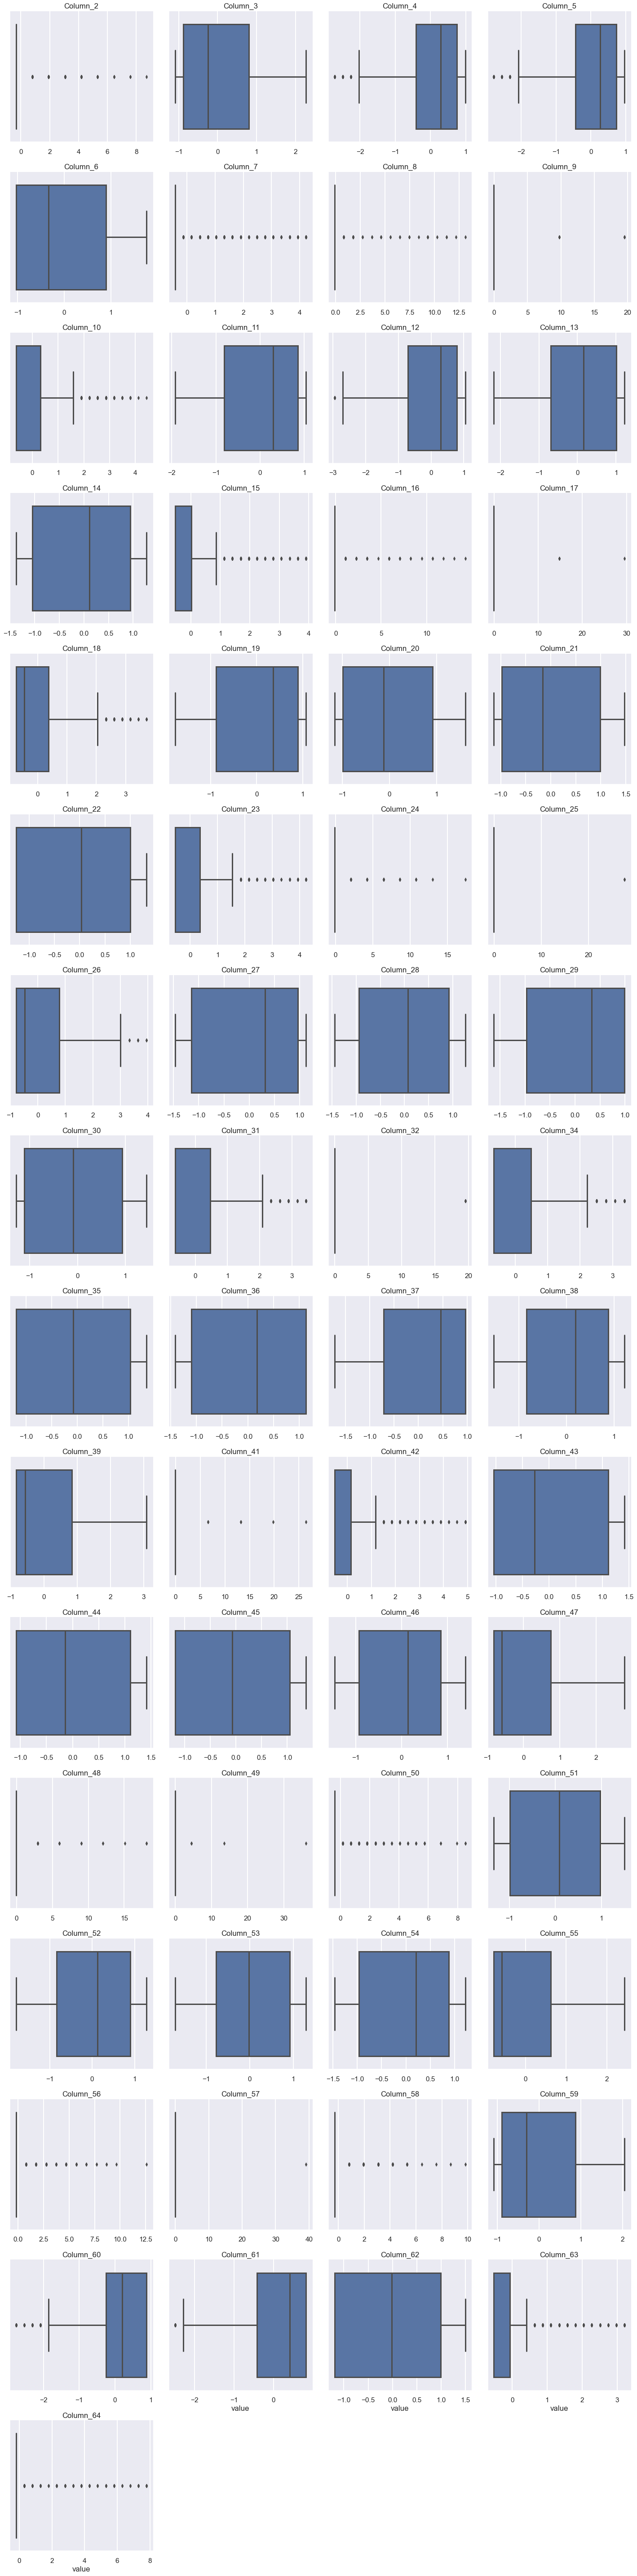

In [10]:
print('\n')
display('Boxplot of the features')
print('\n')

g = sns.FacetGrid(data_copy.melt(), col="variable", col_wrap=4, height=5, sharex=False,sharey=False)
g.map(sns.boxplot, "value")  # Adjust the number of bins as needed
g.set_titles("{col_name}")  # Set the title as the feature/column name

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()  # Show the plot


In [11]:
# Count the number of Outliers
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3-Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers = column[(column < LB) | (column > UB)]
    return len(outliers)

# Count outliers for each column and sum the occurrences
total_outliers = sum(data_copy.apply(count_outliers))


print('\n',"\033[1m\033[1mPercentage of Data Points which are outliers:\033[0m",round(total_outliers/data_copy.size*100,2),'%')


 Percentage of Data Points which are outliers: 3.25 %


##### We are not removing the outliers as this can be correct data and we may remove good data from our data set.

In [12]:
pd.options.display.float_format='{:,.3f}'.format 

print("\n","\033[1m\033[1mView of the first 10 columns and first five rows\033[0m")
print('________________________________________________________________________________________________')
display(data_copy.iloc[:,:10].head()) # view the first 10 coulmns 
print("\n","\033[1m\033[1mView of the last 10 columns and first five rows\033[0m")
print('________________________________________________________________________________________________')
display(data_copy.iloc[:,-10:].head()) # view the last 10 columns and confirm that Label_Data is dropped

print(data_copy.shape)


 View of the first 10 columns and first five rows
________________________________________________________________________________________________


,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11
0,-0.338,-0.039,0.290,-0.675,-0.862,-0.422,-0.133,-0.064,-0.636,0.482
1,-0.338,-1.089,0.058,0.261,-0.160,-0.422,-0.133,-0.064,-0.636,-1.921
2,-0.338,-1.089,-1.798,0.729,1.070,-0.422,-0.133,-0.064,-0.636,-1.366
3,-0.338,0.381,0.755,0.261,-0.862,-0.422,-0.133,-0.064,1.903,0.482
4,-0.338,-1.089,-2.494,-0.207,-1.038,-0.422,-0.133,-0.064,-0.636,-1.921



 View of the last 10 columns and first five rows
________________________________________________________________________________________________


,Column_55,Column_56,Column_57,Column_58,Column_59,Column_60,Column_61,Column_62,Column_63,Column_64
0,-0.784,-0.218,-0.026,-0.307,0.089,0.201,-0.423,-1.192,-0.528,-0.208
1,-0.784,-0.218,-0.026,-0.307,-1.087,-0.256,0.818,0.485,-0.528,-0.208
2,0.222,-0.218,-0.026,-0.307,-1.087,-2.083,-0.217,1.492,1.576,-0.208
3,1.027,-0.218,-0.026,-0.307,0.285,0.201,0.197,0.318,-0.528,-0.208
4,-0.784,-0.218,-0.026,-0.307,-1.087,-2.312,0.818,-0.521,-0.528,-0.208


(1528, 61)


## Now we have 61 Features. Let us check the correlation between them

In [75]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 
corr=data_copy.corr()
display(corr)

,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,Column_13,Column_14,Column_15,Column_16,Column_17,Column_18,Column_19,Column_20,Column_21,Column_22,Column_23,Column_24,Column_25,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_34,Column_35,Column_36,Column_37,Column_38,Column_39,Column_41,Column_42,Column_43,Column_44,Column_45,Column_46,Column_47,Column_48,Column_49,Column_50,Column_51,Column_52,Column_53,Column_54,Column_55,Column_56,Column_57,Column_58,Column_59,Column_60,Column_61,Column_62,Column_63,Column_64
Column_2,1.0000,0.5621,0.2085,-0.0142,0.0764,0.0566,-0.0413,0.0364,0.5456,0.2224,-0.1237,0.0039,-0.0704,-0.0228,-0.0459,-0.0054,0.2269,-0.1098,-0.1092,0.0728,-0.1761,-0.1322,-0.0402,-0.0122,-0.0699,-0.1292,0.0920,0.0341,-0.2088,-0.1651,-0.0173,-0.1774,-0.1904,0.0342,-0.0715,-0.2303,-0.1740,-0.0190,-0.1294,-0.1662,-0.0052,-0.0402,-0.1452,-0.0824,-0.0302,-0.0130,0.2271,0.0884,0.0271,0.0733,0.0027,0.0193,-0.0511,-0.0086,0.8430,0.5578,0.2044,-0.0793,-0.0346,0.0173,-0.0490
Column_3,0.5621,1.0000,0.5651,-0.0843,0.0436,0.0164,-0.0595,0.0244,0.5779,0.6268,-0.2949,0.0241,0.0479,-0.0860,-0.0998,-0.0182,0.2741,-0.0887,-0.3105,0.1998,-0.1077,-0.2150,-0.1226,-0.0394,-0.1694,-0.3104,0.1290,0.1931,-0.1885,-0.1938,-0.0558,-0.3626,-0.4169,-0.0531,-0.1248,-0.2754,-0.1871,-0.0613,-0.2737,-0.3611,-0.1688,-0.1986,-0.1924,-0.0702,-0.0728,-0.0418,0.1986,0.2411,-0.0482,-0.0432,0.0825,0.0491,-0.0076,-0.0279,0.5307,0.9377,0.5354,-0.1160,-0.0379,0.0774,0.0922
Column_4,0.2085,0.5651,1.0000,0.0266,-0.1881,-0.1049,-0.0297,0.0394,0.3383,0.6142,-0.0135,-0.0928,-0.0015,-0.1772,-0.1069,0.0253,0.1938,0.0463,-0.3811,0.0486,-0.0457,-0.2146,-0.1440,-0.0021,-0.1248,-0.2667,-0.0569,0.0671,-0.1871,-0.1236,-0.0713,-0.2449,-0.2411,0.0185,-0.0959,-0.2224,-0.0121,-0.0761,-0.2444,-0.0957,-0.0194,-0.2648,-0.2192,0.1139,0.0481,-0.0663,0.0182,0.3094,0.2816,-0.2032,0.0322,0.1584,0.0769,-0.0519,0.1820,0.5656,0.7920,-0.0493,-0.0485,0.0595,0.0880
Column_5,-0.0142,-0.0843,0.0266,1.0000,0.4913,0.1220,0.0098,0.0452,0.0646,0.0238,-0.1404,0.1302,0.3881,0.1302,0.0148,0.0104,0.0411,-0.1174,-0.1574,-0.0393,0.1897,0.0799,0.0223,0.0094,0.0320,-0.0688,0.0201,0.0892,0.1227,0.0825,0.0134,-0.0203,-0.0199,0.0379,0.0800,0.0744,0.0455,0.0208,-0.0263,-0.0735,-0.0118,0.0573,0.0731,-0.0931,-0.0395,0.0259,-0.0081,-0.1417,-0.0027,0.0484,-0.1241,-0.2645,-0.2364,0.0186,-0.0419,-0.0190,-0.0014,-0.0845,-0.2309,-0.2656,-0.2383
Column_6,0.0764,0.0436,-0.1881,0.4913,1.0000,0.6124,0.1550,-0.0012,0.0431,0.0543,-0.1999,-0.0589,0.5439,0.5366,0.1120,-0.0281,0.0492,-0.0654,-0.1808,-0.0809,0.2162,0.1557,-0.0024,-0.0249,0.0207,-0.0508,0.1011,0.1594,0.1772,0.0049,-0.0352,-0.1938,-0.1423,-0.0053,0.1019,0.0707,-0.0957,-0.0387,-0.1777,-0.3214,-0.1496,0.1311,0.0241,-0.2678,-0.0866,-0.0113,-0.0394,-0.2910,-0.1448,0.0460,-0.1546,-0.3597,-0.2031,0.0319,0.0800,0.1000,-0.0926,-0.3770,-0.2805,-0.2849,-0.1828
Column_7,0.0566,0.0164,-0.1049,0.1220,0.6124,1.0000,0.4942,-0.0270,-0.0368,-0.0077,0.0134,-0.0719,0.1891,0.7252,0.3641,-0.0204,-0.0385,0.0272,-0.0735,-0.1690,0.0461,0.2833,0.1260,-0.0153,0.0023,0.0250,0.0258,0.0306,0.1433,0.0717,0.0156,-0.1232,-0.0474,0.0390,0.1036,0.0842,-0.0620,-0.0238,-0.1284,-0.2311,-0.0277,0.1832,-0.0674,-0.2430,-0.0377,-0.0136,-0.0405,-0.2715,-0.0350,0.0535,-0.2875,-0.2828,-0.0919,-0.0034,0.0712,0.0561,-0.0453,-0.4252,-0.3266,-0.1924,-0.0876
Column_8,-0.0413,-0.0595,-0.0297,0.0098,0.1550,0.4942,1.0000,-0.0085,-0.0617,-0.0464,0.0658,-0.0305,0.0425,0.4297,0.6948,-0.0064,-0.0749,-0.0213,-0.0339,-0.1006,0.0151,0.3098,0.2925,-0.0048,-0.0552,-0.0212,-0.0647,-0.0424,0.1215,0.1145,0.1631,-0.0580,-0.0129,0.0169,0.0602,0.0644,-0.0238,-0.0075,-0.0491,-0.0677,0.0208,0.0954,-0.0878,-0.0988,-0.0119,-0.0051,-0.0516,-0.1362,0.0290,-0.0018,-0.1824,-0.1041,-0.0290,-0.0034,-0.0380,-0.0459,0.0038,-0.2057,-0.1561,-0.0701,-0.0276
Column_9,0.0364,0.0244,0.0394,0.0452,-0.0012,-0.0270,-0.0085,1.0000,0.2460,0.0451,-0.0373,0.0157,0.02

## Heatmap

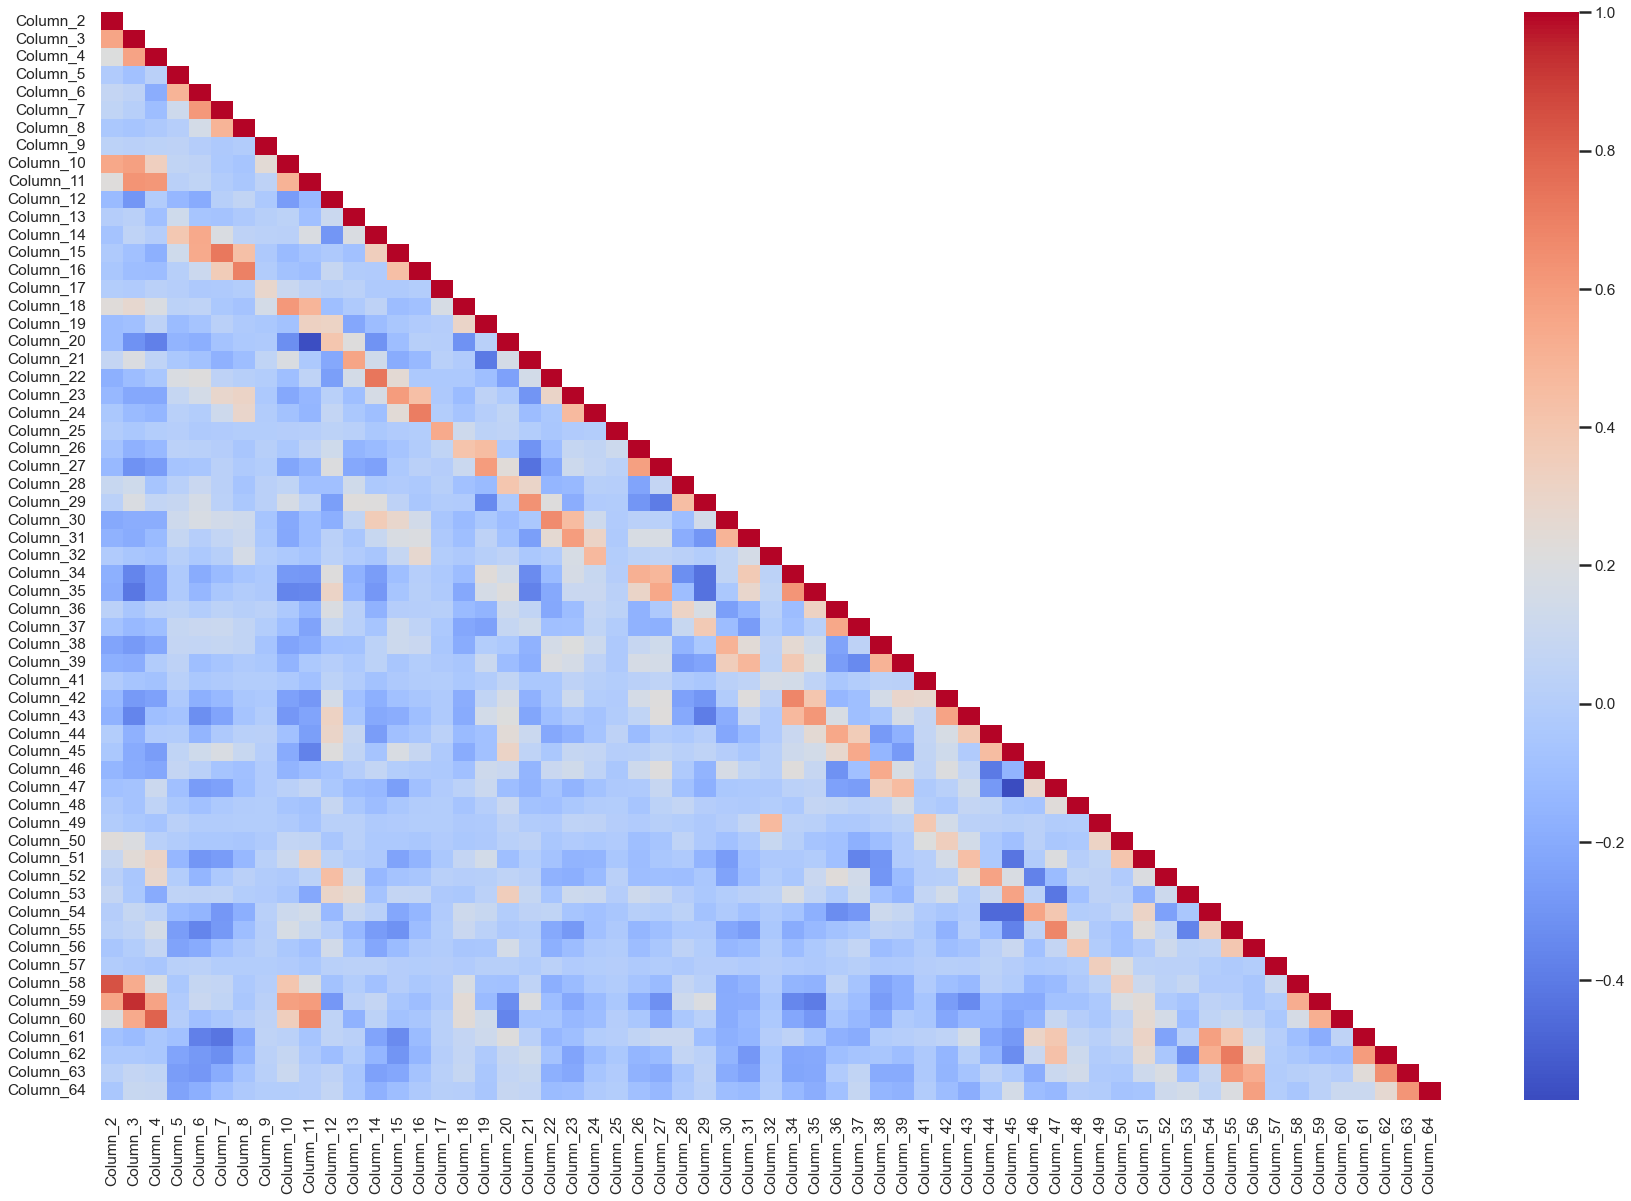

In [14]:
#sns.set_context('paper',font_scale =1.5, rc={"grid.linewidth":0.1})
max_corr = corr.max().max()
min_corr = corr.min().min()
sns.set_style("white")
plt.figure(figsize=(30,20))
sns.heatmap(data_copy.corr(),
           annot=False,
           mask=np.triu(data_copy.corr(),+1),
           cmap='coolwarm',
           vmax=max_corr,
           vmin=min_corr);

# PCA to remove multi-colinearaity and reduce dimensions

###  Bartlett_Sphericity Test to ascertain if we can apply PCA

#### H0: The matrix of population correlations is equal to Identity Matrix
#### H1: The matrix of population correlations is not equal to Identity Matrix

In [15]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data_copy)
p_value

0.0

#### Since p-value is less than alpha (0.05) , the null hypothesis is rejected and we conclude that multicollinearity exists in the data

In [16]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data_copy)
kmo_model

0.7260811645354842

####  KMO value more than 0.6 , so it can be concluded that some features can predict other features

# PCA to decompose to 30 Principal components

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30, random_state=seed)
PCA_list=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
          'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
          'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30']
df_pca = pca.fit_transform(data_copy)
display(df_pca.shape) # Component output
df_pca=pd.DataFrame(df_pca,
                   columns=PCA_list,
                   index=data_copy.index)
display(df_pca.head())

(1528, 30)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,1.827,-0.947,-3.939,2.013,-0.193,-0.061,1.294,1.623,-0.343,-0.795,...,0.067,0.820,0.430,-0.802,-0.471,0.388,0.336,-0.134,0.312,-0.676
1,0.760,0.831,4.029,-1.737,-1.295,0.333,-1.657,0.286,1.146,-0.066,...,1.033,-0.134,-0.331,0.410,1.023,0.320,-1.474,0.425,-0.680,-0.572
2,1.445,-0.365,3.119,-1.968,-2.134,0.146,1.768,1.068,0.700,-2.201,...,-0.529,-0.375,-1.159,-0.284,-0.576,0.169,0.466,-0.299,-0.253,1.153
3,-3.077,-0.709,-0.632,-2.172,-0.404,1.049,-0.259,-1.383,0.388,1.077,...,0.657,-0.019,0.583,-0.625,0.184,-0.863,-0.070,-0.255,-0.012,-1.049
4,4.468,-1.300,0.902,-1.428,-1.635,1.714,-0.265,-0.939,-1.139,1.756,...,0.460,0.035,0.757,-0.096,0.685,-2.200,0.377,0.392,1.169,0.845


In [18]:
pca.components_   # weights of the PCA's

loadings = pd.DataFrame(pca.components_,
                       index=PCA_list,
                       columns=data_copy.columns)
display(loadings.head(3))
display(loadings.tail(3))
display(loadings.shape)

,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,...,Column_55,Column_56,Column_57,Column_58,Column_59,Column_60,Column_61,Column_62,Column_63,Column_64
PC1,-0.178,-0.283,-0.221,0.029,0.020,0.061,0.068,-0.037,-0.244,-0.231,...,-0.132,-0.049,0.002,-0.158,-0.275,-0.203,-0.036,-0.116,-0.125,-0.074
PC2,0.061,0.079,-0.013,0.152,0.276,0.249,0.146,0.001,0.040,0.027,...,-0.249,-0.119,0.006,0.059,0.099,0.001,-0.256,-0.234,-0.158,-0.069
PC3,0.023,-0.047,-0.043,-0.065,-0.078,-0.022,-0.010,0.006,-0.050,-0.169,...,-0.018,0.124,0.013,0.037,-0.044,-0.078,-0.058,-0.008,0.124,0.115


,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,...,Column_55,Column_56,Column_57,Column_58,Column_59,Column_60,Column_61,Column_62,Column_63,Column_64
PC28,-0.061,-0.012,0.027,0.131,-0.122,0.091,0.234,0.074,-0.108,0.034,...,-0.142,-0.106,-0.267,0.021,-0.055,0.021,0.213,0.113,0.057,0.010
PC29,0.087,-0.263,-0.112,-0.084,-0.083,-0.106,0.099,-0.126,0.229,0.027,...,-0.136,0.239,-0.067,0.046,-0.301,0.057,-0.070,-0.232,-0.169,0.209
PC30,-0.034,0.035,-0.147,-0.126,0.196,0.057,0.030,0.044,0.000,0.016,...,-0.133,-0.216,0.033,-0.043,0.022,-0.071,0.112,0.044,0.057,0.082


(30, 61)

Text(0.5, 1.0, 'Scree Plot')

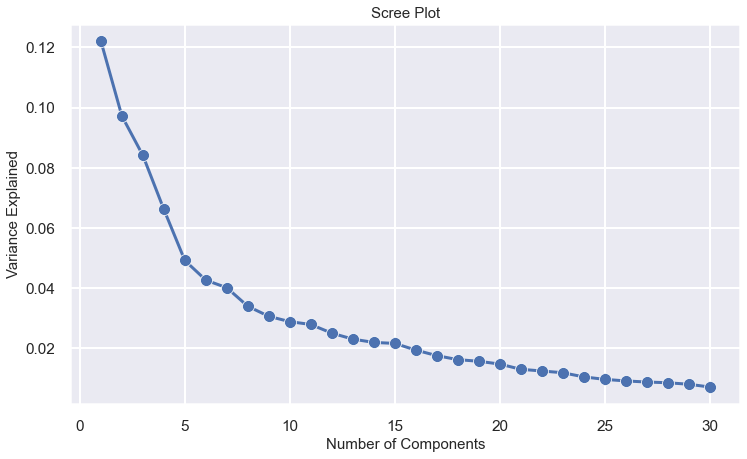

In [19]:
var_exp= pca.explained_variance_ratio_


sns.set_style("darkgrid")
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)



,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
index,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
Var_Exp,0.122,0.097,0.084,0.066,0.049,0.043,0.040,0.034,0.031,0.029,...,0.013,0.012,0.012,0.010,0.010,0.009,0.009,0.008,0.008,0.007
Cum_Var,0.122,0.219,0.303,0.369,0.419,0.461,0.501,0.535,0.566,0.595,...,0.810,0.823,0.834,0.845,0.854,0.864,0.872,0.881,0.889,0.896


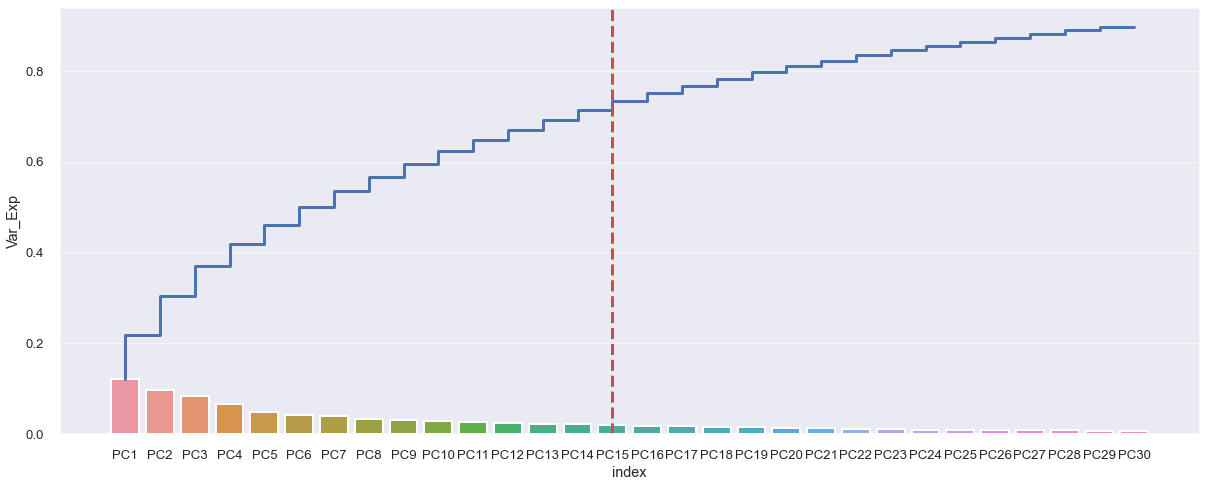

In [20]:
var_exp= pca.explained_variance_ratio_
cum_var_exp= np.cumsum(pca.explained_variance_ratio_)

var_df = pd.DataFrame({'Var_Exp':var_exp,
              'Cum_Var':cum_var_exp},
               index = PCA_list).reset_index(drop=False)

display(var_df.T)
sns.set_style("darkgrid")
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
plt.figure(figsize=(17,7))
sns.barplot(data=var_df,
            y ="Var_Exp",
            x = 'index');  

plt.step(x=var_df.index,
        y=var_df.Cum_Var);
plt.axvline(x=14,ls='--',c='r');
plt.tight_layout();


# We will use 16 Principal components ,which give us cummulative varriance of 75.1%

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=16, random_state=seed)
PCA_list=['PC1','PC2','PC3','PC4','PC5',
          'PC6','PC7','PC8','PC9','PC10',
          'PC11','PC12','PC13','PC14','PC15', 'PC16']
df_pca = pca.fit_transform(data_copy)

df_pca=pd.DataFrame(df_pca,
                   columns=PCA_list,
                   index=data_copy.index)
display(df_pca.head()) # Component output
display(df_pca.shape)  # the new dataframe on which we will work

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,1.827,-0.947,-3.939,2.014,-0.193,-0.060,1.294,1.619,-0.337,-0.783,-0.810,-0.790,0.586,-0.324,0.549,0.113
1,0.760,0.831,4.029,-1.737,-1.296,0.330,-1.658,0.292,1.139,-0.088,-0.746,0.831,-0.224,-0.125,-0.614,-0.190
2,1.445,-0.365,3.119,-1.968,-2.134,0.147,1.768,1.071,0.699,-2.196,1.442,-2.090,-0.637,-0.119,-1.378,0.316
3,-3.077,-0.709,-0.632,-2.172,-0.404,1.049,-0.259,-1.389,0.391,1.079,-0.868,0.366,-0.229,1.004,0.612,-0.838
4,4.468,-1.300,0.902,-1.428,-1.635,1.714,-0.264,-0.947,-1.137,1.764,-0.470,-1.761,-0.068,-0.637,0.503,0.271


(1528, 16)

# KMeans++ Clustering

In [22]:
n_clusters= [2,3,4,5,6,7,8,9,10,11,12,13,14]               # create a list of number of clusters for evaluation     
clusters_inertia_pp= []                                 # create an empty list where WSS sores can be appended
s_score_pp = []                                        # create an empty list where Silhouette sores can be appended 
seed = 123

# run a loop code so that the WSS scores (Inertia scores) and Silhouette scores for different Clusters are appended to the 
# empty list created above

for n in n_clusters:
    KM_pp = KMeans(n_clusters=n,
                    init='k-means++',
                    random_state=seed).fit(df_pca)
    
    clusters_inertia_pp.append(KM_pp.inertia_) 
    s_score_pp.append(silhouette_score(df_pca,KM_pp.labels_,random_state=seed))


## Elbow Plot and the Scree Plot for KMeans++

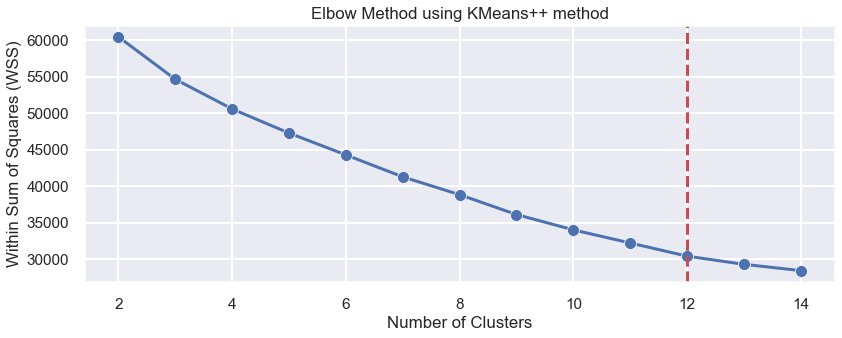

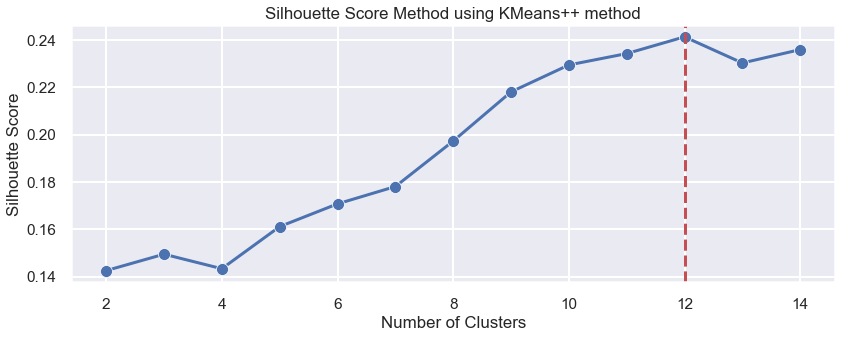

In [23]:
sns.set_context('poster',font_scale = .7, rc={"grid.linewidth": 2})

fig,ax =plt.subplots(figsize=(12,5))
ax=sns.lineplot(n_clusters,
                clusters_inertia_pp,
                ax=ax,
                marker='o')
ax.set_title('Elbow Method using KMeans++ method')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Within Sum of Squares (WSS)')
ax.axvline(x=12,ls='--',c='r')
plt.tight_layout();


fig,ax =plt.subplots(figsize=(12,5))
ax=sns.lineplot(n_clusters,
                s_score_pp,
                ax=ax,
                marker='o')
ax.set_title('Silhouette Score Method using KMeans++ method')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.axvline(x=12,ls='--',c='r')
plt.tight_layout();

## The Silhouette Score is maximum for 12 clusters

## 12 Clusters using KMeans++ algorithim

In [24]:
KM_pp = KMeans(n_clusters=12,
                      init='k-means++',
                      random_state=seed).fit(df_pca)

KM_clustered = df_pca.copy() # make a copy of the data set, in which we will keep adding the new cluster labels
KM_clustered.loc[:,'Cluster_KMeans_pp'] = KM_pp.labels_  # add last column as the new Cluster labels created
display(KM_clustered.iloc[:,-5:].head())  # see the last 5 columns view the new column added

display(KM_clustered.shape)
display(KM_pp.inertia_)
display(silhouette_score(df_pca,KM_pp.labels_,random_state=seed))

,PC13,PC14,PC15,PC16,Cluster_KMeans_pp
0,0.586,-0.324,0.549,0.113,3
1,-0.224,-0.125,-0.614,-0.190,2
2,-0.637,-0.119,-1.378,0.316,2
3,-0.229,1.004,0.612,-0.838,7
4,-0.068,-0.637,0.503,0.271,11


(1528, 17)

30423.538186204147

0.24132545541691264

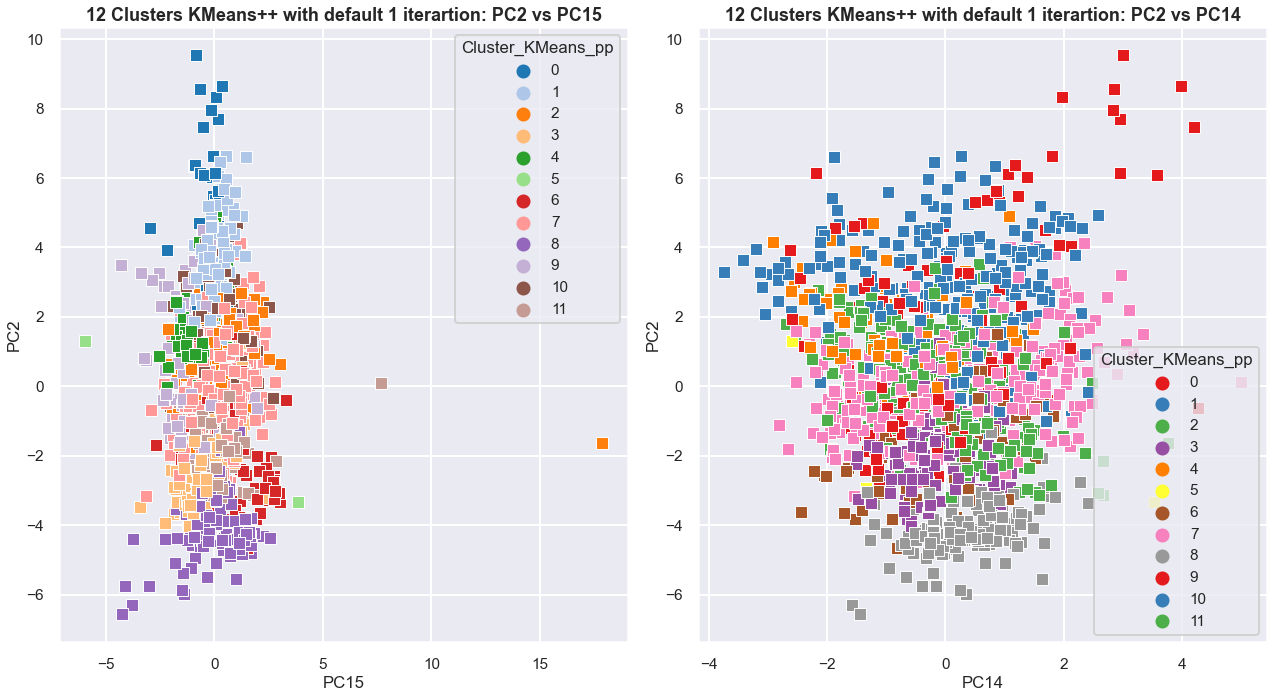

In [25]:
sns.set_context('poster',font_scale = .7, rc={"grid.linewidth": 2})

fig,(ax) = plt.subplots(1,2,figsize=(18,10))
sns.scatterplot(data= KM_clustered,
                       x=KM_clustered['PC15'],
                       y=KM_clustered['PC2'],
                       hue='Cluster_KMeans_pp',
                       ax=ax[0],
                       palette='tab20',
                       legend='full',
                       marker ='s',
                       )
ax[0].set_title('12 Clusters KMeans++ with default 1 iterartion: PC2 vs PC15',
               fontweight = 'bold',
                fontsize = 18);
                   
sns.scatterplot(data= KM_clustered,
                        x=KM_clustered['PC14'],
                       y=KM_clustered['PC2'],
                       hue='Cluster_KMeans_pp',
                       ax=ax[1],
                       palette='Set1',
                       legend='full',
                       marker='s',
                       )
ax[1].set_title('12 Clusters KMeans++ with default 1 iterartion: PC2 vs PC14',
               fontweight = 'bold',
                fontsize = 18);
'''
ax[0].scatter(KM_pp.cluster_centers_[:,-1],KM_pp.cluster_centers_[:,0],marker='o',color='black',s=100)
ax[1].scatter(KM_pp.cluster_centers_[:,-2],KM_pp.cluster_centers_[:,0],marker='o',color='black',s=100);
'''
plt.tight_layout();

Cluster_KMeans_pp,0,1,2,3,4,5,6,7,8,9,10,11
KM_pp_size,27,148,194,156,96,3,69,337,155,96,113,134


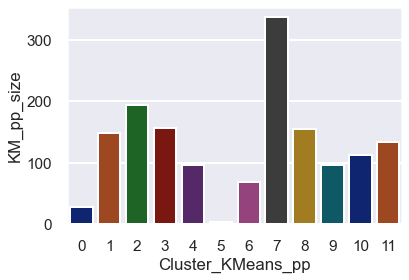

In [26]:
KM_pp_cluster_sizes = KM_clustered.groupby('Cluster_KMeans_pp').size().to_frame()
KM_pp_cluster_sizes.columns = ["KM_pp_size"]
display(KM_pp_cluster_sizes.T)

barplot_KMeans_pp=sns.barplot(data=KM_pp_cluster_sizes,
                                x=KM_pp_cluster_sizes.index,
                                y='KM_pp_size',
                                palette='dark');
barplot_KMeans_pp;

## Evaluation of K-Means++

In [27]:
pd.options.display.float_format='{:,.6f}'.format
resultpp=pd.DataFrame({'WSS':KM_pp.inertia_,
                     'Silhouette Score':silhouette_score(df_pca,KM_pp.labels_)},                           
                     index=['KMeans++ Model using 1 iteration'])
                                   
resultpp

,WSS,Silhouette Score
KMeans++ Model using 1 iteration,"30,423.538186",0.241325


# Clusters using normal KMeans algorithim, init = ' random '

In [28]:
# Clustering using the KMeans++ algorithm

n_clusters= [2,3,4,5,6,7,8,9,10,11,12,13,14]               # create a list of number of clusters for evaluation     
clusters_inertia_rand= []                                 # create an empty list where WSS sores can be arandended
s_score_rand = []                                        # create an empty list where Silhouette sores can be arandended 
seed = 123

# run a loop code so that the WSS scores (Inertia scores) and Silhouette scores for different Clusters are arandended to the 
# empty list created above

for n in n_clusters:
    KM_rand = KMeans(n_clusters=n,
                    init='random',
                    random_state=seed).fit(df_pca)
    
    clusters_inertia_rand.append(KM_rand.inertia_) 
    s_score_rand.append(silhouette_score(df_pca,KM_rand.labels_,random_state=seed))




# Elbow Plot and the Scree Plot for KMeans method

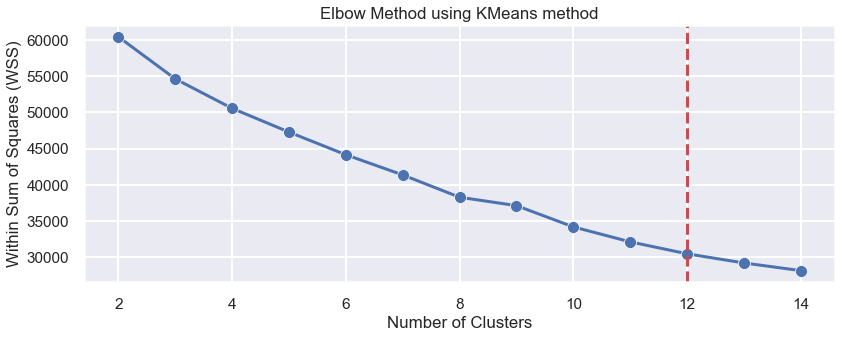

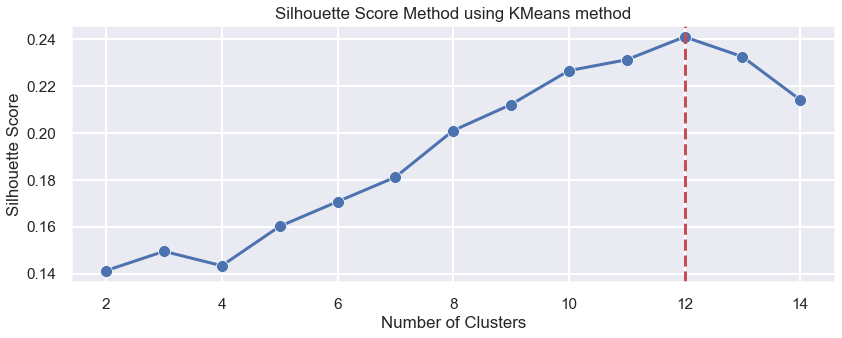

In [29]:
sns.set_context('poster',font_scale = .7, rc={"grid.linewidth": 2})

fig,ax =plt.subplots(figsize=(12,5))
ax=sns.lineplot(n_clusters,
                clusters_inertia_rand,
                ax=ax,
                marker='o')
ax.set_title('Elbow Method using KMeans method')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Within Sum of Squares (WSS)')
ax.axvline(x=12,ls='--',c='r')
plt.tight_layout();


fig,ax =plt.subplots(figsize=(12,5))
ax=sns.lineplot(n_clusters,
                s_score_rand,
                ax=ax,
                marker='o')
ax.set_title('Silhouette Score Method using KMeans method')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.axvline(x=12,ls='--',c='r')
plt.tight_layout();


# The Silhouette Score is maximum for 12 clusters

# 12 Clusters using KMeans algorithim

In [30]:
KM_rand = KMeans(n_clusters=12,
                 init='random',
                 random_state=seed).fit(df_pca)

KM_clustered.loc[:,'Cluster_KMeans_rand'] = KM_rand.labels_  # add last column as the new Cluster labels created
display(KM_clustered.iloc[:,-5:].head())  # see the last 5 columns view the new column added

display(KM_clustered.shape)
display(KM_rand.inertia_)
display(silhouette_score(df_pca,KM_rand.labels_,random_state=seed))


,PC14,PC15,PC16,Cluster_KMeans_pp,Cluster_KMeans_rand
0,-0.323695,0.548550,0.112996,3,1
1,-0.125113,-0.614427,-0.190269,2,6
2,-0.119043,-1.377680,0.315526,2,6
3,1.003619,0.612045,-0.838091,7,3
4,-0.636971,0.502685,0.270896,11,8


(1528, 18)

30505.4591756866

0.24092355731898152

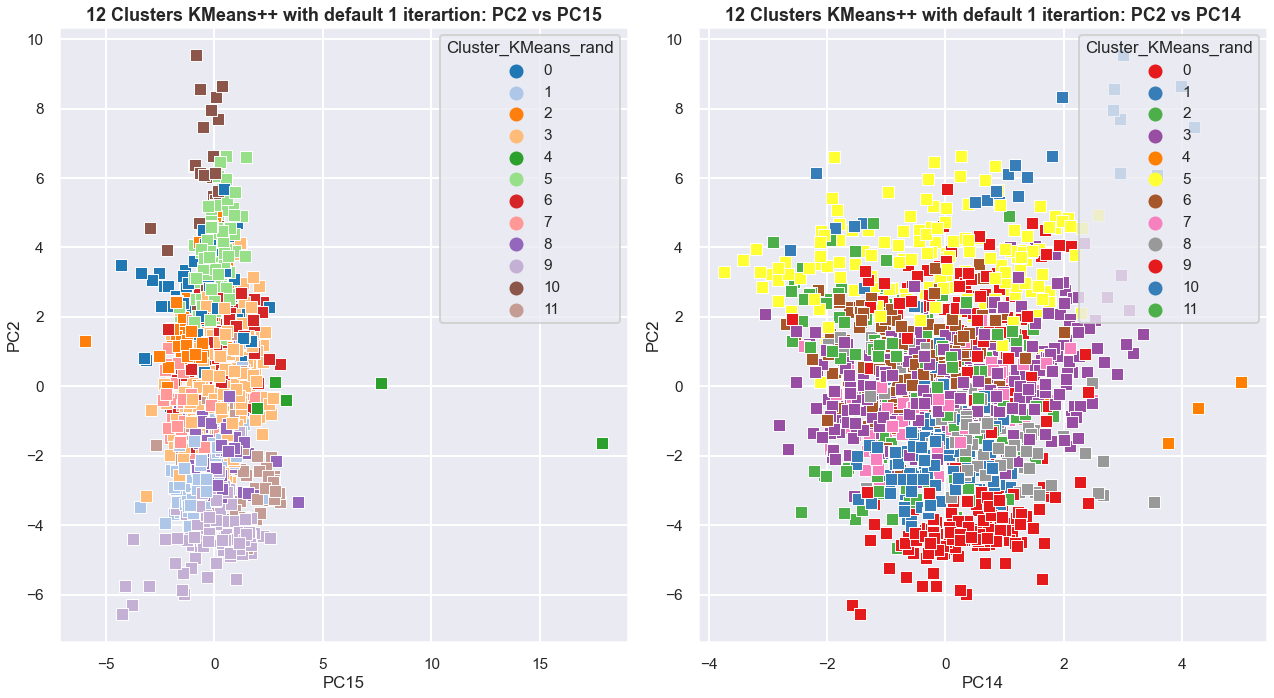

In [31]:
sns.set_context('poster',font_scale = .7, rc={"grid.linewidth": 2})

fig,(ax) = plt.subplots(1,2,figsize=(18,10))
sns.scatterplot(data= KM_clustered,
                       x=KM_clustered['PC15'],
                       y=KM_clustered['PC2'],
                       hue='Cluster_KMeans_rand',
                       ax=ax[0],
                       palette='tab20',
                       legend='full',
                       marker ='s',
                       )
ax[0].set_title('12 Clusters KMeans++ with default 1 iterartion: PC2 vs PC15',
               fontweight = 'bold',
                fontsize = 18);
                   
sns.scatterplot(data= KM_clustered,
                        x=KM_clustered['PC14'],
                       y=KM_clustered['PC2'],
                       hue='Cluster_KMeans_rand',
                       ax=ax[1],
                       palette='Set1',
                       legend='full',
                       marker='s',
                       )
ax[1].set_title('12 Clusters KMeans++ with default 1 iterartion: PC2 vs PC14',
               fontweight = 'bold',
                fontsize = 18);
'''
ax[0].scatter(KM_rand.cluster_centers_[:,-1],KM_rand.cluster_centers_[:,0],marker='o',color='black',s=100)
ax[1].scatter(KM_rand.cluster_centers_[:,-2],KM_rand.cluster_centers_[:,0],marker='o',color='black',s=100);
'''
plt.tight_layout();


Cluster_KMeans_rand,0,1,2,3,4,5,6,7,8,9,10,11
KM_rand_size,107,156,92,357,5,154,180,92,136,156,27,66


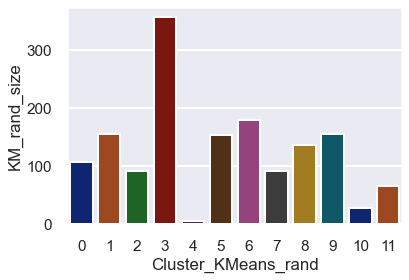

In [32]:
KM_rand_cluster_sizes = KM_clustered.groupby('Cluster_KMeans_rand').size().to_frame()
KM_rand_cluster_sizes.columns = ["KM_rand_size"]
display(KM_rand_cluster_sizes.T)

barplot_KMeans_rand=sns.barplot(data=KM_rand_cluster_sizes,
                                x=KM_rand_cluster_sizes.index,
                                y='KM_rand_size',
                                palette='dark');
barplot_KMeans_rand;

## Evaluation of K-Means clustering

In [33]:
# Performance Evaluation

resultrand=pd.DataFrame({'WSS':KM_rand.inertia_,
                     'Silhouette Score':silhouette_score(df_pca,KM_rand.labels_)},                           
                     index=['KMeans Model using 1 iteration'])
                                   
resultrand


,WSS,Silhouette Score
KMeans Model using 1 iteration,"30,505.459176",0.240924


# Clusters for normal KMeans algorithim, init = ' random ', iterated 50 times


In [34]:
n_clusters= [2,3,4,5,6,7,8,9,10,11,12,13,14]               # create a list of number of clusters for evaluation     
clusters_inertia_rand50= []                                 # create an empty list where WSS sores can be arandended
s_score_rand50 = []                                        # create an empty list where Silhouette sores can be arandended 
seed = 123

# run a loop code so that the WSS scores (Inertia scores) and Silhouette scores for different Clusters are arandended to the 
# empty list created above

for n in n_clusters:
    KM_rand50 = KMeans(n_clusters=n,
                       init='random',
                       n_init= 50 ,
                       random_state=seed).fit(df_pca)
    
    clusters_inertia_rand50.append(KM_rand50.inertia_) 
    s_score_rand50.append(silhouette_score(df_pca,KM_rand50.labels_,random_state=seed))

## Elbow Plot and the Scree Plot for KMeans (50 iterartions) method


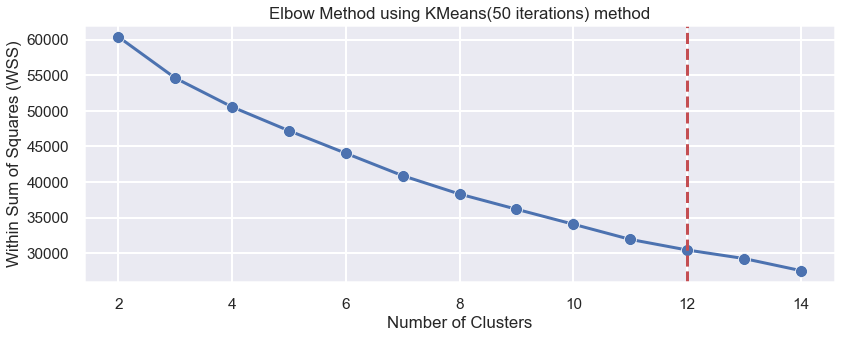

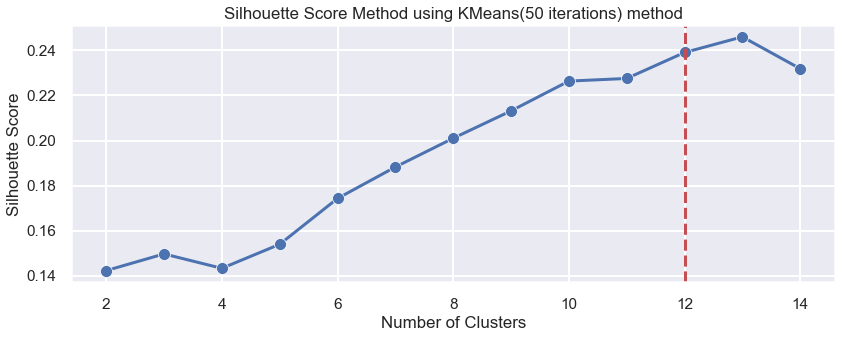

In [35]:
fig,ax =plt.subplots(figsize=(12,5))

ax=sns.lineplot(n_clusters,
                clusters_inertia_rand50,
                ax=ax,
                marker='o')
ax.set_title('Elbow Method using KMeans(50 iterations) method')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Within Sum of Squares (WSS)')
ax.axvline(x=12,ls='--',c='r')
plt.tight_layout();


fig,ax =plt.subplots(figsize=(12,5))
ax=sns.lineplot(n_clusters,
                s_score_rand50,
                ax=ax,
                marker='o')
ax.set_title('Silhouette Score Method using KMeans(50 iterations) method')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.axvline(x=12,ls='--',c='r')
plt.tight_layout();


## The Silhouette Score is maximum for 12 clusters

## 12 Clusters using KMeans ( 50 iterations ) algorithim

In [36]:
KM_rand50 = KMeans(n_clusters=12,
                   init='random',
                   n_init=50,
                   random_state=seed).fit(df_pca)

KM_clustered.loc[:,'Cluster_KMeans_rand50'] = KM_rand50.labels_  # add last column as the new Cluster labels created
display(KM_clustered.iloc[:,-5:].head())  # see the last 5 columns view the new column added

display(KM_clustered.shape)
display(KM_rand50.inertia_)
display(silhouette_score(df_pca,KM_rand50.labels_,random_state=seed))

,PC15,PC16,Cluster_KMeans_pp,Cluster_KMeans_rand,Cluster_KMeans_rand50
0,0.548550,0.112996,3,1,9
1,-0.614427,-0.190269,2,6,10
2,-1.377680,0.315526,2,6,10
3,0.612045,-0.838091,7,3,1
4,0.502685,0.270896,11,8,2


(1528, 19)

30435.2205647786

0.2390869093492361

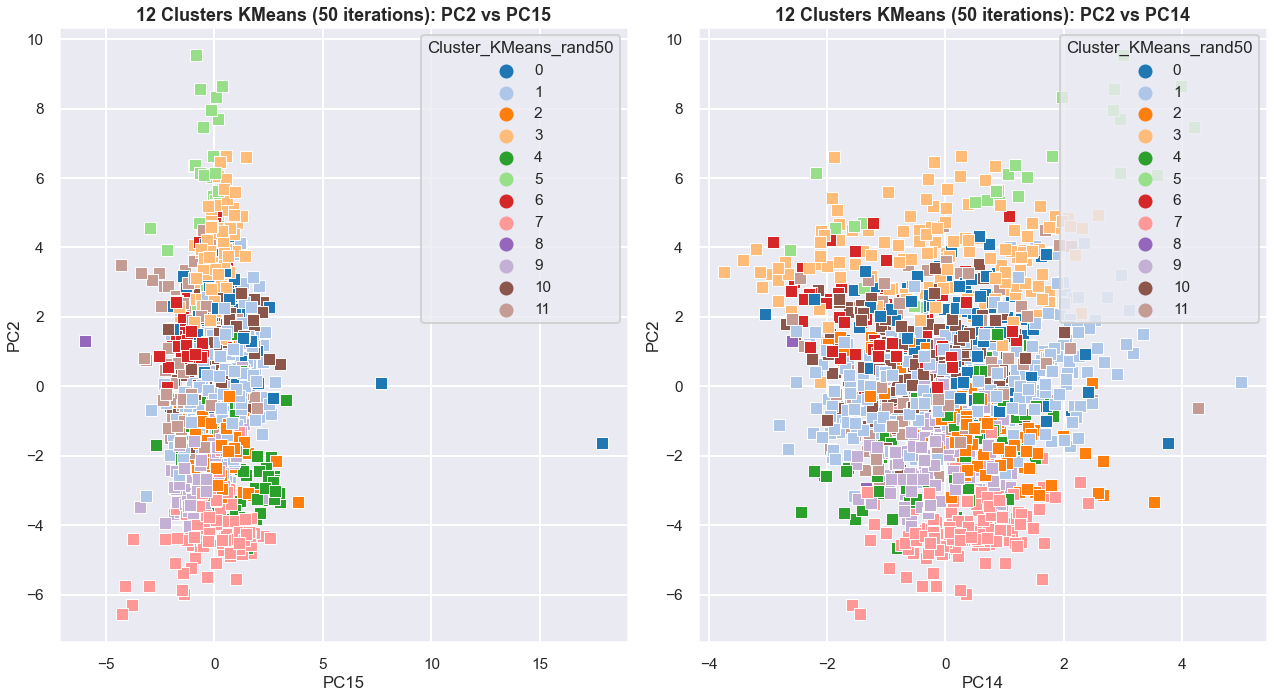

In [37]:
new_palette = 'tab20'  # Replace 'viridis' with the desired palette name

# Rest of the code remains the same
fig, ax = plt.subplots(1, 2, figsize=(18, 10))
sns.scatterplot(data=KM_clustered,
                x=KM_clustered['PC15'],
                y=KM_clustered['PC2'],
                hue='Cluster_KMeans_rand50',
                ax=ax[0],
                palette=new_palette,  # Use the new palette here
                legend='full',
                marker='s',
               )
ax[0].set_title('12 Clusters KMeans (50 iterations): PC2 vs PC15',
                fontweight='bold',
                fontsize=18)

sns.scatterplot(data=KM_clustered,
                x=KM_clustered['PC14'],
                y=KM_clustered['PC2'],
                hue='Cluster_KMeans_rand50',
                ax=ax[1],
                palette=new_palette,  # Use the new palette here
                legend='full',
                marker='s',
               )
ax[1].set_title('12 Clusters KMeans (50 iterations): PC2 vs PC14',
                fontweight='bold',
                fontsize=18)

plt.tight_layout()
plt.show()

Cluster_KMeans_rand50,0,1,2,3,4,5,6,7,8,9,10,11
KM_rand50_size,116,336,134,149,69,27,89,155,2,156,192,103


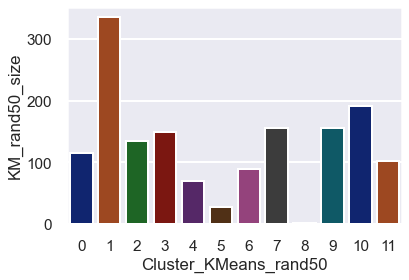

In [38]:
KM_rand50_cluster_sizes = KM_clustered.groupby('Cluster_KMeans_rand50').size().to_frame()
KM_rand50_cluster_sizes.columns = ["KM_rand50_size"]
display(KM_rand50_cluster_sizes.T)

barplot_KMeans_rand50=sns.barplot(data=KM_rand50_cluster_sizes,
                                x=KM_rand50_cluster_sizes.index,
                                y='KM_rand50_size',
                                palette='dark');
barplot_KMeans_rand50;

## Performance Evaluation


In [39]:
resultrand50=pd.DataFrame({'WSS':KM_rand50.inertia_,
                     'Silhouette Score':silhouette_score(df_pca,KM_rand50.labels_)},                           
                     index=['KMeans Model using 50 iterations'])
                                   
resultrand50


,WSS,Silhouette Score
KMeans Model using 50 iterations,"30,435.220565",0.239087


## Comparing the performance of clustring by these  models

In [40]:
comparision = pd.concat([resultrand,resultrand50,resultpp],axis=0)
comparision

,WSS,Silhouette Score
KMeans Model using 1 iteration,"30,505.459176",0.240924
KMeans Model using 50 iterations,"30,435.220565",0.239087
KMeans++ Model using 1 iteration,"30,423.538186",0.241325


## K-Means++ gives us best results when we observe silhouette score. K-Means with 50 iterations give us better results though than K-means with only 1 itteration.

## Apply DBSCAN on this dataset (digitData2.csv) and find the optimum "eps" and "min_samples" value. Is the number of clusters the same as the cluster found in Q2? Explain the similarity or differences that you have found between two solutions.

In [41]:
from sklearn.cluster import DBSCAN

In [42]:
'''
We create an array of eps values which we want to try
'''

episilon =np.linspace(3.2,3.8,10)
episilon

array([3.2       , 3.26666667, 3.33333333, 3.4       , 3.46666667,
       3.53333333, 3.6       , 3.66666667, 3.73333333, 3.8       ])

In [43]:
'''
create an array of min_samples values also
'''

min_samples = np.arange(15,18,1)
min_samples

array([15, 16, 17])

In [44]:
import itertools

In [45]:
'''
Let us try 50 combinations of eps and min_samples and check which combination
gives the highest silhouette score
'''

combinations = list(itertools.product(episilon,min_samples))
display(combinations)
N = len(combinations)
N

[(3.2, 15),
 (3.2, 16),
 (3.2, 17),
 (3.2666666666666666, 15),
 (3.2666666666666666, 16),
 (3.2666666666666666, 17),
 (3.3333333333333335, 15),
 (3.3333333333333335, 16),
 (3.3333333333333335, 17),
 (3.4, 15),
 (3.4, 16),
 (3.4, 17),
 (3.466666666666667, 15),
 (3.466666666666667, 16),
 (3.466666666666667, 17),
 (3.533333333333333, 15),
 (3.533333333333333, 16),
 (3.533333333333333, 17),
 (3.6, 15),
 (3.6, 16),
 (3.6, 17),
 (3.6666666666666665, 15),
 (3.6666666666666665, 16),
 (3.6666666666666665, 17),
 (3.7333333333333334, 15),
 (3.7333333333333334, 16),
 (3.7333333333333334, 17),
 (3.8, 15),
 (3.8, 16),
 (3.8, 17)]

30

#### There are 30 combinations of eps and min_samples

In [46]:
'''
Define a function to get the silhouette score from differnt combinations
of eps and min_samples for a dataframe
'''


def get_sc_and_labels(combinations,df):
    scores = []                                   # create an empty list of silhouette scores
    all_labels_list = []                          # create an empty list of labels
    
    for i, ( eps, num_samples ) in enumerate(combinations):                      # run the code for all combinations
        dbscan_cluster_model = DBSCAN(eps=eps,min_samples=num_samples).fit(df)   
        labels = dbscan_cluster_model.labels_      #  find the labels
        labels_set = set(labels)                   # make a set of the labels created
        num_clusters = len(labels_set)             # find the number of clusters
        
        '''
        Reduce the number of clusters by 1 , if -1 is present as a cluster, which represents outliers/noise in the data
        '''

        if -1 in labels_set:
            num_clusters -= 1
            
        
        '''
        ignore those combinations which throw up less than 2 clusters or more than 15 clusters.
        In that case append in the scores list an absurd silhouette score of -10 and 'bad' in the labels list.
        Print: Combination ( _ , _ ) on iteration _ of 35 has _ cluster. Ignore and go to the next combination.
        '''    
        
        if (num_clusters < 2) or (num_clusters > 15):  
            scores.append(-10)
            all_labels_list.append('bad')
            c = (eps, num_samples)
            print(f'Combination {c} on iteration {i+1} of {N} has {num_clusters} cluster.Ignore and go to the next combination.')
            continue
            
        '''
        for all other cases, other than when the number of clusters is less than 2 or more than 100, 
        append the scores and labels to the empty list created earlier.
        print-'Index:  _  , Score :  _    , Labels : [       ], NumClusters : _
        '''

        scores.append(silhouette_score(df,labels))
        all_labels_list.append(labels)
        print(f'Index:{i} , Score : {scores[-1]}, Labels : {all_labels_list[-1]}, NumClusters : {num_clusters}')    
        
        '''
        Get the best scores and the labels associated with that score.
        '''


    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_score = scores[best_index]   
    
    return {'best_epsilon': best_parameters[0],
           'best_min_samples': best_parameters[1],
           'best_labels': best_labels,
           'best_score': best_score,
            
           }
           
            
best_dict = get_sc_and_labels(combinations,df_pca)


Index:0 , Score : 0.08234316110045378, Labels : [ 0  1 -1 ...  4  4  5], NumClusters : 7
Index:1 , Score : 0.0808581264781325, Labels : [ 0  1 -1 ...  4  4  5], NumClusters : 7
Index:2 , Score : 0.0643992971878868, Labels : [ 0  1 -1 ...  4  4  5], NumClusters : 7
Index:3 , Score : 0.061885582045108335, Labels : [ 0  1 -1 ...  4  4  5], NumClusters : 9
Index:4 , Score : 0.0766366775657809, Labels : [ 0  1 -1 ...  4  4  5], NumClusters : 8
Index:5 , Score : 0.0838183586987426, Labels : [ 0  1 -1 ...  4  4  5], NumClusters : 7
Index:6 , Score : 0.027855874749648905, Labels : [ 0  0 -1 ...  0  0  2], NumClusters : 4
Index:7 , Score : 0.0315444700620553, Labels : [ 0  0 -1 ...  2  2  3], NumClusters : 6
Index:8 , Score : 0.06511248506428598, Labels : [ 0  0 -1 ...  2  2  3], NumClusters : 4
Index:9 , Score : 0.02748666434069872, Labels : [ 0  0 -1 ...  0  0  2], NumClusters : 5
Index:10 , Score : 0.021896576975011583, Labels : [ 0  0 -1 ...  0  0  2], NumClusters : 4
Index:11 , Score : 0.0

## Best Parameters for the DBSCAN algorithm

In [47]:
best_dict

{'best_epsilon': 3.8,
 'best_min_samples': 15,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'best_score': 0.23324389747259494}

In [48]:
KM_clustered['Cluster_DBSCAN'] = best_dict['best_labels']

,-1,0,1
Cluster_DBSCAN,116,1386,26


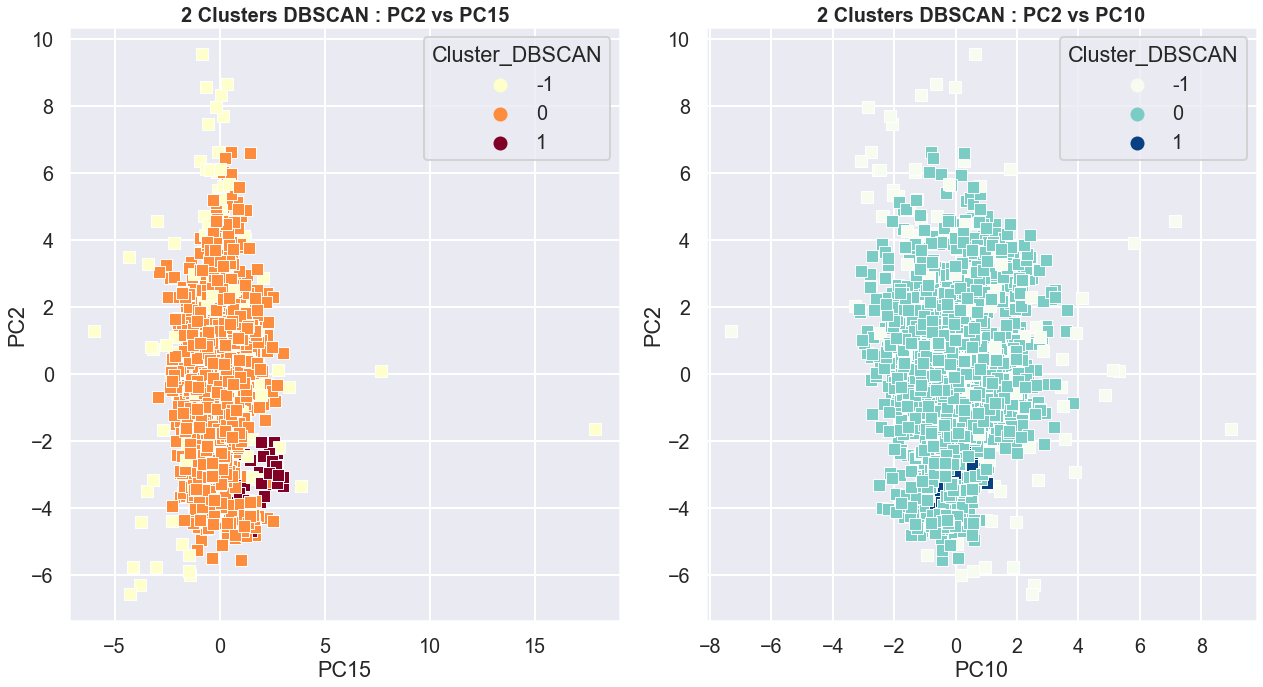

In [80]:
display(KM_clustered['Cluster_DBSCAN'].value_counts().to_frame().sort_index().T)

sns.set_context('poster',font_scale = .9, rc={"grid.linewidth": 2})

fig,(ax) = plt.subplots(1,2,figsize=(18,10))
sns.scatterplot(data= KM_clustered,
                       x=KM_clustered['PC15'],
                       y=KM_clustered['PC2'],
                       hue='Cluster_DBSCAN',
                       ax=ax[0],
                       palette='YlOrRd',
                       legend='full',
                       marker ='s',
                       )
ax[0].set_title('2 Clusters DBSCAN : PC2 vs PC15',
               fontweight = 'bold',
                fontsize = 20);
                   
sns.scatterplot(data= KM_clustered,
                       x=KM_clustered['PC10'],
                       y=KM_clustered['PC2'],
                       hue='Cluster_DBSCAN',
                       ax=ax[1],
                       palette='GnBu',
                       legend='full',
                       marker='s',
                       )
ax[1].set_title('2 Clusters DBSCAN : PC2 vs PC10',
               fontweight = 'bold',
                fontsize = 20);

plt.tight_layout()

### With DBSCAN we get makes 2 clusters  with 1363 and 22 data points.
### 143 data points are considered as outliers ( noise )

### DBSCAN algorithim makes only 2 clusters which is far less clusters than KMeans++ algorithim

# Part 2 Assignment

Load "diabetes" datasets from SKlearn and do the PCA for n=3, and plot the data.
1. What is the variance (%) covered by the first 3 components? How is this percentage of
variance computed?
2. Is there any correlation between these three components?
3. Apply t-SNE on the same dataset, select the first 3 components and plot them.
4. Report the comparison between the results obtained using t-SNE and PCA

## Importing data.

In [50]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.DESCR)

diabetes.data

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [51]:
df1= pd.DataFrame(data=diabetes.data,
                 columns=diabetes.feature_names)
df1['target'] = diabetes.target
display(df1.head())

df1.shape


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.000000
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.000000
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.000000
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.000000
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.000000


(442, 11)

In [52]:
pd.options.display.float_format='{:,.4f}'.format
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0000,-0.0000,0.0476,-0.1072,-0.0373,0.0054,0.0381,0.1107
sex,442.0000,0.0000,0.0476,-0.0446,-0.0446,-0.0446,0.0507,0.0507
bmi,442.0000,-0.0000,0.0476,-0.0903,-0.0342,-0.0073,0.0312,0.1706
bp,442.0000,-0.0000,0.0476,-0.1124,-0.0367,-0.0057,0.0356,0.1320
s1,442.0000,-0.0000,0.0476,-0.1268,-0.0342,-0.0043,0.0284,0.1539
s2,442.0000,0.0000,0.0476,-0.1156,-0.0304,-0.0038,0.0298,0.1988
s3,442.0000,-0.0000,0.0476,-0.1023,-0.0351,-0.0066,0.0293,0.1812
s4,442.0000,-0.0000,0.0476,-0.0764,-0.0395,-0.0026,0.0343,0.1852
s5,442.0000,0.0000,0.0476,-0.1261,-0.0332,-0.0019,0.0324,0.1336
s6,442.0000,0.0000,0.0476,-0.1378,-0.0332,-0.0011,0.0279,0.1356


This is already a scaled data.

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Description of age
---------------------
count   442.0000
mean     -0.0000
std       0.0476
min      -0.1072
25%      -0.0373
50%       0.0054
75%       0.0381
max       0.1107
Name: age, dtype: float64 Distribution of age
---------------------


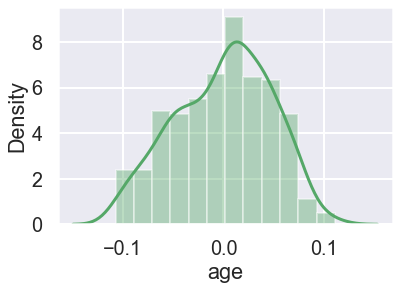

BoxPlot of age
---------------------


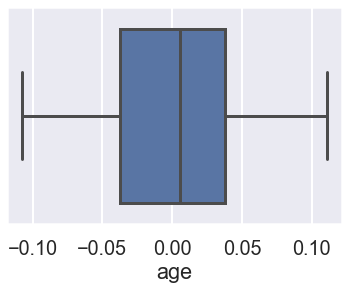

Description of sex
---------------------
count   442.0000
mean      0.0000
std       0.0476
min      -0.0446
25%      -0.0446
50%      -0.0446
75%       0.0507
max       0.0507
Name: sex, dtype: float64 Distribution of sex
---------------------


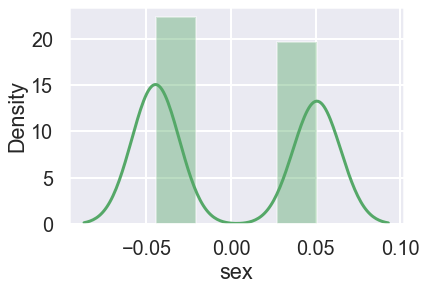

BoxPlot of sex
---------------------


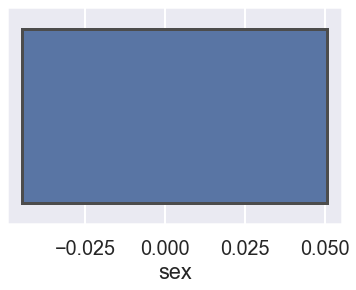

Description of bmi
---------------------
count   442.0000
mean     -0.0000
std       0.0476
min      -0.0903
25%      -0.0342
50%      -0.0073
75%       0.0312
max       0.1706
Name: bmi, dtype: float64 Distribution of bmi
---------------------


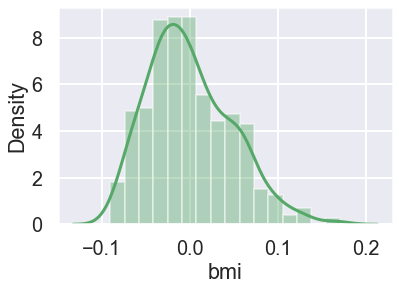

BoxPlot of bmi
---------------------


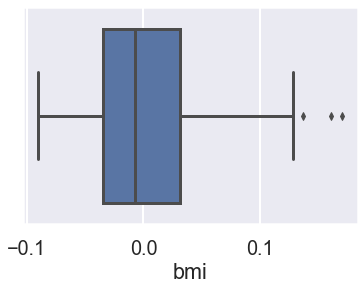

Description of bp
---------------------
count   442.0000
mean     -0.0000
std       0.0476
min      -0.1124
25%      -0.0367
50%      -0.0057
75%       0.0356
max       0.1320
Name: bp, dtype: float64 Distribution of bp
---------------------


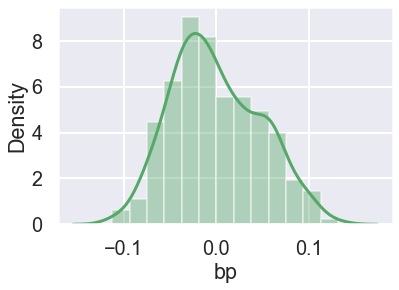

BoxPlot of bp
---------------------


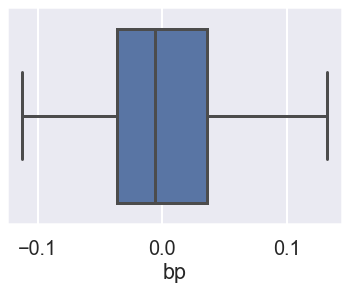

Description of s1
---------------------
count   442.0000
mean     -0.0000
std       0.0476
min      -0.1268
25%      -0.0342
50%      -0.0043
75%       0.0284
max       0.1539
Name: s1, dtype: float64 Distribution of s1
---------------------


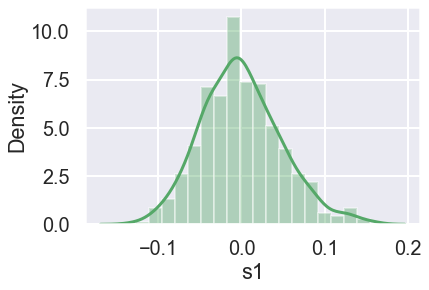

BoxPlot of s1
---------------------


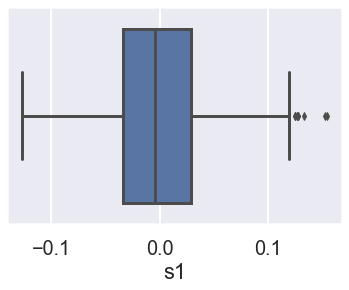

Description of s2
---------------------
count   442.0000
mean      0.0000
std       0.0476
min      -0.1156
25%      -0.0304
50%      -0.0038
75%       0.0298
max       0.1988
Name: s2, dtype: float64 Distribution of s2
---------------------


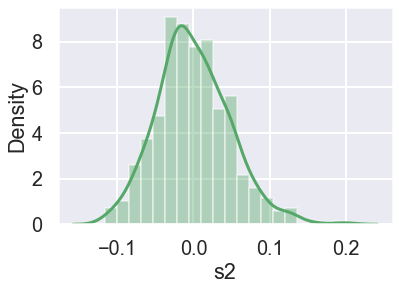

BoxPlot of s2
---------------------


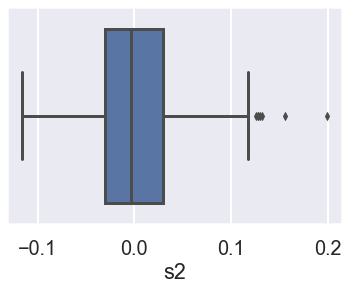

Description of s3
---------------------
count   442.0000
mean     -0.0000
std       0.0476
min      -0.1023
25%      -0.0351
50%      -0.0066
75%       0.0293
max       0.1812
Name: s3, dtype: float64 Distribution of s3
---------------------


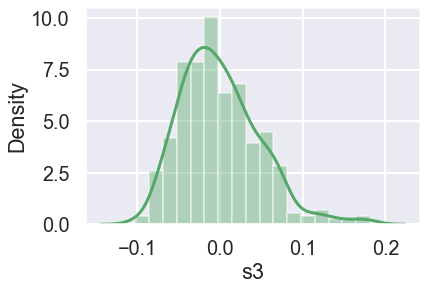

BoxPlot of s3
---------------------


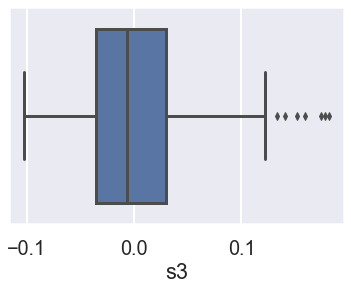

Description of s4
---------------------
count   442.0000
mean     -0.0000
std       0.0476
min      -0.0764
25%      -0.0395
50%      -0.0026
75%       0.0343
max       0.1852
Name: s4, dtype: float64 Distribution of s4
---------------------


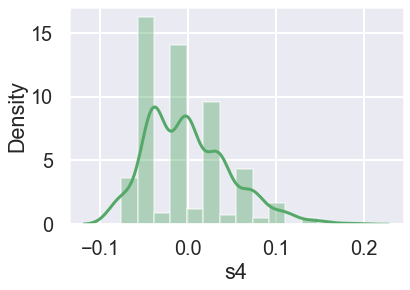

BoxPlot of s4
---------------------


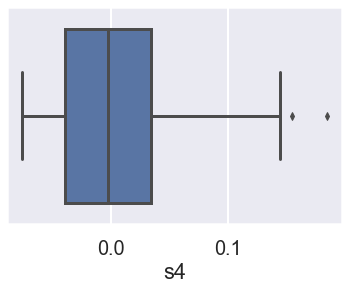

Description of s5
---------------------
count   442.0000
mean      0.0000
std       0.0476
min      -0.1261
25%      -0.0332
50%      -0.0019
75%       0.0324
max       0.1336
Name: s5, dtype: float64 Distribution of s5
---------------------


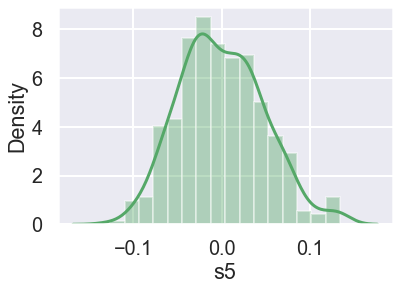

BoxPlot of s5
---------------------


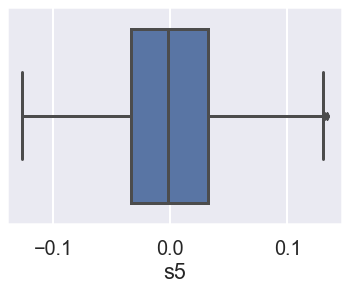

Description of s6
---------------------
count   442.0000
mean      0.0000
std       0.0476
min      -0.1378
25%      -0.0332
50%      -0.0011
75%       0.0279
max       0.1356
Name: s6, dtype: float64 Distribution of s6
---------------------


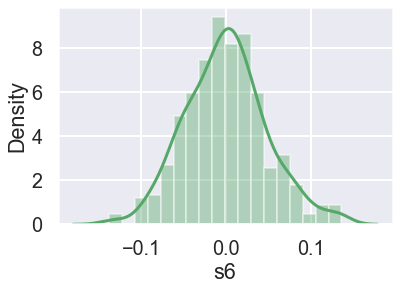

BoxPlot of s6
---------------------


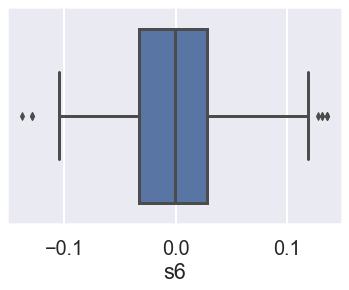

Description of target
---------------------
count   442.0000
mean    152.1335
std      77.0930
min      25.0000
25%      87.0000
50%     140.5000
75%     211.5000
max     346.0000
Name: target, dtype: float64 Distribution of target
---------------------


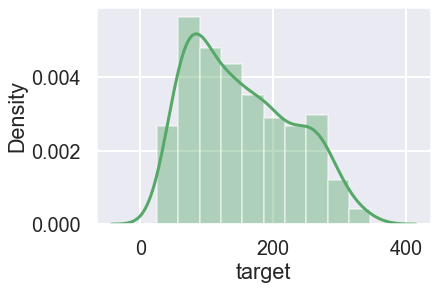

BoxPlot of target
---------------------


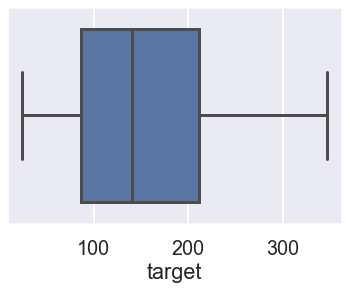

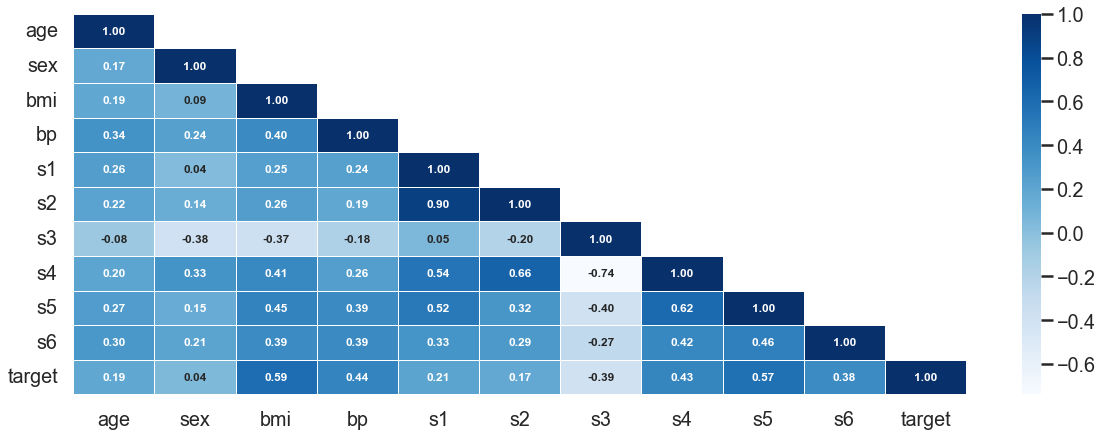

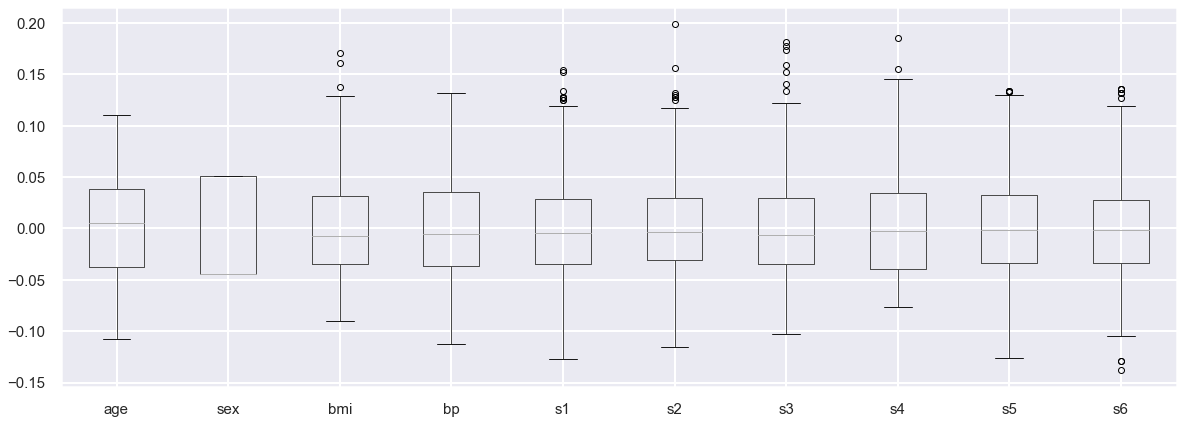

In [54]:
def univariateAnalysis(column,nbins):
    print("Description of " + column)
    print("---------------------")
    print(df1[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("---------------------")
    sns.distplot(df1[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("---------------------")
    ax = sns.boxplot(x=df1[column])
    plt.show()

for x in list(df1.columns.values):
    univariateAnalysis(x,5)

# Bivariate Analysis

sns.set_style("white")

plt.figure(figsize=(20,7))
sns.heatmap(df1.corr(),
            annot=True,
            fmt='.2f',
            mask=np.triu(df1.corr(),k=1),
            linewidths=0.8,
            linecolor='white',
            cmap='Blues',
            annot_kws={"size": 12,"weight":'bold'});


### Outlier Treatment

sns.set_style("darkgrid")

plt.figure(figsize=(20,7))
df1.iloc[:,:-1].boxplot();
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

## Treating Outliers

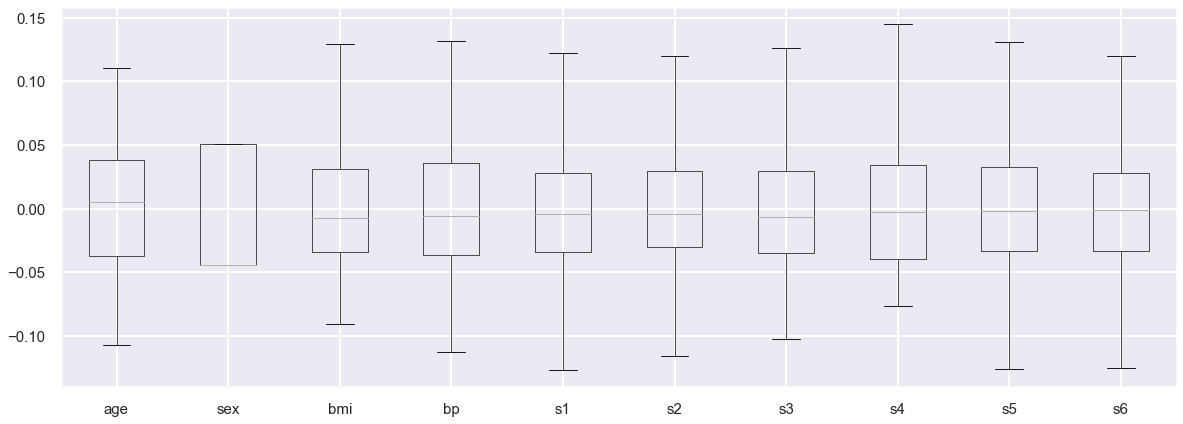

In [55]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)

for i in df1:    
    df1[i]=treat_outlier(df1[i])

plt.figure(figsize=(20,7))
df1.iloc[:,:-1].boxplot();
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);


## Ascertaining if we should apply PCA by Bartlett_Sphericity Test

In [56]:
chi_square_value,p_value=calculate_bartlett_sphericity(df1)
p_value


0.0

### KMO Method

In [57]:
kmo_all,kmo_model=calculate_kmo(df1)
kmo_model

0.5787890085681837

We can apply PCA on this.

In [58]:
DF1 = df1.iloc[:,:-1]   # drop target column
display(DF1.head())
display(DF1.shape)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466


(442, 10)

In [59]:
pca = PCA(n_components=10, random_state=seed)     # decompose to 10 Principal Componenets
PCA_list=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
df1_pca = pca.fit_transform(DF1)

DF1_pca=pd.DataFrame(df1_pca,
                   columns=PCA_list,
                   index=DF1.index)
display(DF1_pca.head())
display(DF1_pca.shape)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.0290,0.0922,0.0274,-0.0021,-0.0132,-0.0474,-0.0094,0.0363,-0.0091,-0.0015
1,-0.1345,-0.0648,0.0046,-0.0240,-0.0043,-0.0485,0.0100,-0.0077,0.0252,0.0002
2,0.0140,0.0776,0.0355,-0.0365,-0.0562,-0.0523,-0.0216,0.0398,-0.0015,-0.0022
3,0.0013,-0.0212,-0.0964,0.0644,0.0123,0.0186,0.0213,-0.0184,-0.0076,-0.0032
4,-0.0359,-0.0395,-0.0004,-0.0071,-0.0035,-0.0399,0.0193,-0.0496,0.0021,-0.0009


(442, 10)

Above dataset shows us PCA results.

In [60]:
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

var_df1=pd.DataFrame({'Variance_Expalined_by_the_Componenet':var_exp,
                     'Cumilative_Variance_Explained':cum_var_exp},
                      index = PCA_list).reset_index(drop=False)

,0,1,2,3,4,5,6,7,8,9
index,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Variance_Expalined_by_the_Componenet,0.4033,0.1473,0.1201,0.0966,0.0672,0.0602,0.0539,0.0433,0.0072,0.0009
Cumilative_Variance_Explained,0.4033,0.5506,0.6707,0.7674,0.8346,0.8947,0.9486,0.9919,0.9991,1.0000


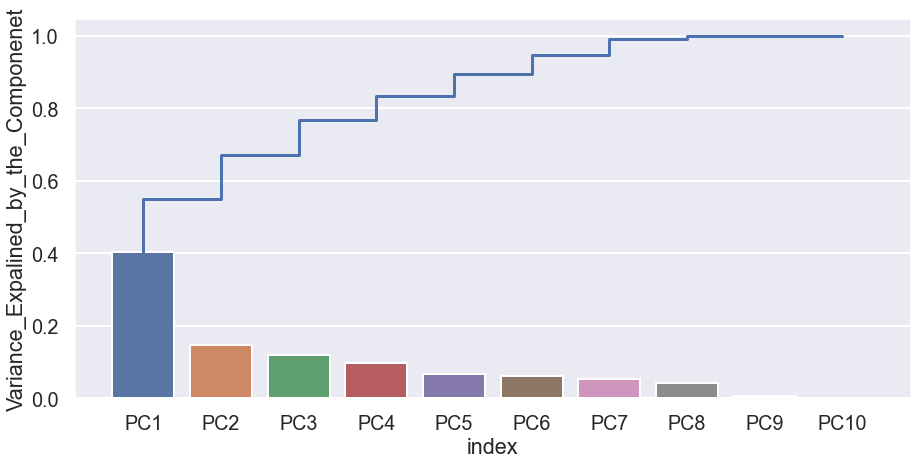

In [61]:
display(var_df1.T)

plt.figure(figsize=(15,7))
# plt.bar(range(25), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
sns.barplot(data=var_df1,
            y ="Variance_Expalined_by_the_Componenet",
            x = 'index');  

plt.step(x=var_df1.index,
        y=var_df1.Cumilative_Variance_Explained);

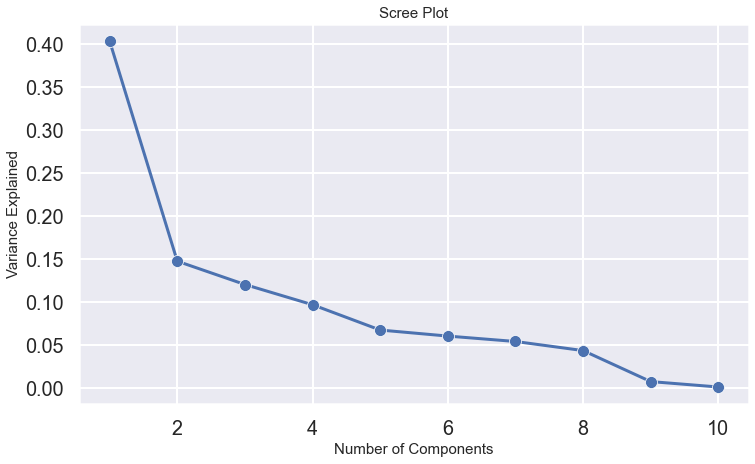

In [62]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.show()


We can say that PC3 explains variance

In [63]:
pca_3 = PCA(n_components=3,
            random_state=seed)
PCA_list_3=['PC1','PC2','PC3']

df1_pca_3 = pca_3.fit_transform(DF1)


display(df1_pca_3.shape) # Component output
DF1_pca_3=pd.DataFrame(df1_pca_3,
                       columns=PCA_list_3,
                       index=DF1.index)
display(DF1_pca_3.head())

(442, 3)

,PC1,PC2,PC3
0,0.0290,0.0922,0.0274
1,-0.1345,-0.0648,0.0046
2,0.0140,0.0776,0.0355
3,0.0013,-0.0212,-0.0964
4,-0.0359,-0.0395,-0.0004


In [64]:
loadings_3 = pd.DataFrame(pca_3.components_,
                       index=PCA_list_3,
                       columns=DF1.columns)
loadings_3


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
PC1,0.2228,0.1889,0.3041,0.2785,0.3407,0.3440,-0.2772,0.4274,0.3840,0.3212
PC2,-0.0430,0.4114,0.1499,0.1460,-0.5750,-0.4554,-0.4845,0.0658,0.0202,0.0873
PC3,0.5054,-0.1155,0.1616,0.5152,-0.0668,-0.2579,0.3800,-0.3918,0.0429,0.2625


In [65]:
var_exp_3 = pca_3.explained_variance_ratio_
cum_var_exp_3 = np.cumsum(pca_3.explained_variance_ratio_)

var_df1_3=pd.DataFrame({'Variance_Expalined_by_the_Componenet':var_exp_3,
              'Cumilative_Variance_Explained':cum_var_exp_3},
               index = PCA_list_3).reset_index(drop=False)


,index,Variance_Expalined_by_the_Componenet,Cumilative_Variance_Explained
0,PC1,0.4033,0.4033
1,PC2,0.1473,0.5506
2,PC3,0.1201,0.6707


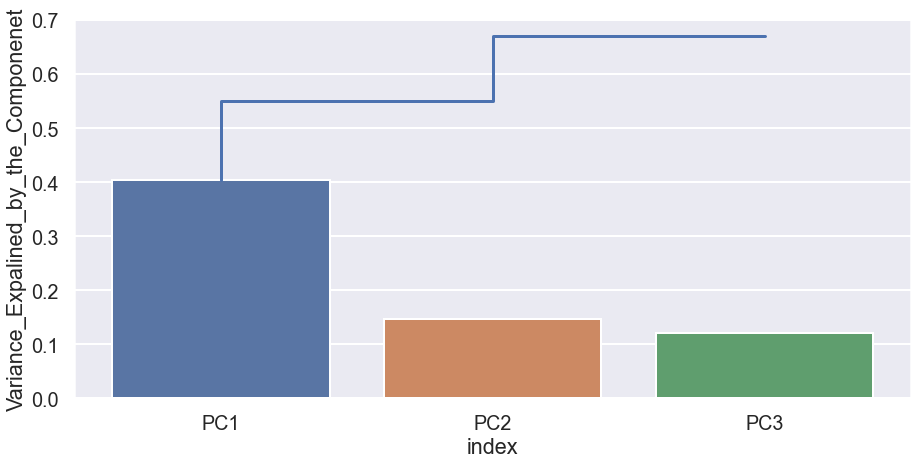

In [66]:
display(var_df1_3)

plt.figure(figsize=(15,7))
sns.barplot(data=var_df1_3,
            y ="Variance_Expalined_by_the_Componenet",
            x = 'index');  

plt.step(x=var_df1_3.index,
        y=var_df1_3.Cumilative_Variance_Explained);

A total of 67% of vairiance is explained by PC3

# t-SNE

In [67]:
from sklearn.manifold import TSNE

In [68]:
tsne = TSNE(n_components=3,
            perplexity=30,
            random_state=seed,
            n_iter=1000)

In [69]:
df1_tsne = tsne.fit_transform(DF1)
df1_tsne.shape


(442, 3)

In [70]:
D_list=['D1','D2','D3']

df1_tsne = tsne.fit_transform(DF1)
display(df1_tsne.shape) # Component output
DF1_tsne=pd.DataFrame(df1_tsne,
                      columns=D_list,
                      index=DF1.index)

display(DF1_tsne.head())


(442, 3)

,D1,D2,D3
0,4.1994,4.0614,-5.7306
1,-6.4161,-0.4273,-1.2626
2,3.6119,4.6320,-5.5863
3,-2.8906,-6.6181,-2.0934
4,-2.7023,-3.8036,-0.2400


## 3D scatter plot

In [71]:
from mpl_toolkits.mplot3d import Axes3D

In [72]:
print(DF1_tsne.columns)

Index(['D1', 'D2', 'D3'], dtype='object')


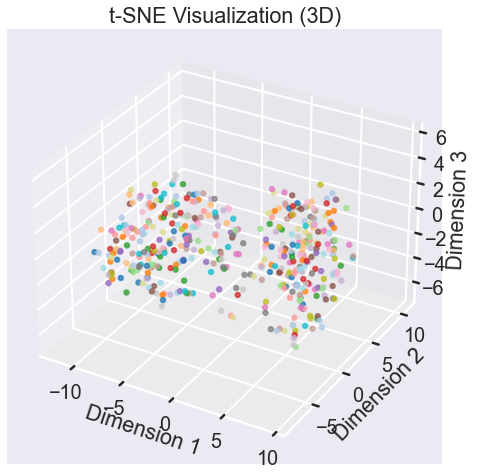

In [73]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract the three t-SNE components
D1 = DF1_tsne['D1']
D2 = DF1_tsne['D2']
D3 = DF1_tsne['D3']

# Extract the cluster labels (using the DataFrame index as a placeholder for clusters)
cluster_labels = DF1_tsne.index

# Convert the cluster labels to integer values
cluster_labels_int = cluster_labels.astype(int)

# Create a colormap for the clusters
num_clusters = len(np.unique(cluster_labels_int))
colors = plt.cm.tab20(cluster_labels_int / num_clusters)  # Divide by num_clusters to get colors within the colormap range

# Create the 3D scatter plot with colored clusters
ax.scatter(D1, D2, D3, c=colors, alpha=0.7)

# Set labels for the axes
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# Set the title for the plot
ax.set_title('t-SNE Visualization (3D)')

# Show the plot
plt.show()

In [74]:
labels = DF1_tsne.index

# Find the number of unique clusters
num = labels.nunique()
num

442

### All the data is represented in 3D format

# Comparison between t-SNE and PCA

t-SNE is a visualisation technique. PCA is Dimentionality reduction technique.  
t-SNE can handle outliers whereas PCA is affected by outliers.  
t-SNE minimises the distance between points. PCA rotates the vectors to reduce dimentionality.  
t-SNE is suitable for non linearly separable data where as PCA is suitable for linearly separable data.

# Bibliography  
GeeksforGeeks. (n.d.). ML | t-SNE Algorithm. GeeksforGeeks. https://www.geeksforgeeks.org/ml-t-distributed-stochastic-neighbor-embedding-t-sne-algorithm/

Sharma, A. (2019, May 16). t-SNE Clearly Explained. Towards Data Science. https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a

Sinha, S. (2017, January 30). t-SNE – A Detailed Guide to Understanding and Implementing t-SNE in Python. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/

GeeksforGeeks. (n.d.). Difference Between PCA and t-SNE. GeeksforGeeks.https://www.geeksforgeeks.org/difference-between-pca-vs-t-sne/